In [189]:
#Wind Speed in Lake Michigan near Chicago using Crib Data provided by Chicag Harbors

import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [190]:
url="https://www.glerl.noaa.gov/metdata/plot_3hr.php?site=chi&units=e#metdata"
html_content = requests.get(url)

In [191]:
# Parse the html content
soup = BeautifulSoup(html_content.content, "html.parser")


t


# print the parsed data of html
mydivs=soup.find_all("div",{"class":"small"})
mytable=mydivs[2]
mytable
#type(mytable)

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<!--<![endif]-->
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <title>
   GLERL METDATA 3-Hour Chicago, IL
  </title>
  <meta content="Information from NOAA-GLERL" name="description"/>
  <meta content="width=device-width, user-scalable=1" name="viewport"/>
  <!-- REQUIRED METADATA -->
  <!-- NOAA Great Lakes Environmental Research Laboratory   -->
  <!-- 4840 S. State Rd.                             -->
  <!-- Ann Arbor, MI 48108-9719                             -->
  <!-- 734-741-2235                                         -->
  <!-- contact: www.glerl@noaa.gov                          -->
  <!-- ==================================================== -->
  <!--GLERL scientist

<div class="small">
<pre>
                  Wind  Wind  Wind   Air   Dew   Rel
                   Spd   Gst   Dir  Temp    Pt   Hum
YYYY-MM-DD   CDT   kts   kts   deg     F     F     %
2021-06-17 16:36  12.4  13.8   131  76.5  61.9  60.2
2021-06-17 16:34  14.8  15.6   131  77.0  60.5  56.1
2021-06-17 16:32  15.6  15.9   127  75.9  59.9  57.1
2021-06-17 16:30  14.8  15.4   124  75.0  61.9  63.3
2021-06-17 16:28  15.6  16.1   125  75.4  61.6  61.7
2021-06-17 16:26  16.3  16.9   126  75.2  60.7  60.2
2021-06-17 16:24  15.4  16.1   125  75.0  61.8  63.0
2021-06-17 16:22  15.7  16.5   123  75.9  61.4  60.1
2021-06-17 16:20  16.5  16.9   124  76.8  59.4  54.4
2021-06-17 16:18  15.9  16.7   123  77.7  58.2  50.5
2021-06-17 16:16  15.9  16.1   123  76.5  57.2  50.7
2021-06-17 16:14  16.7  17.1   123  75.6  59.6  57.2
2021-06-17 16:12  15.9  17.1   123  75.6  59.6  57.2
2021-06-17 16:10  15.6  16.1   119  75.6  59.4  56.8
2021-06-17 16:08  16.7  17.5   119  75.0  58.5  55.9
2021-06-17 16:06  15

In [192]:
table = soup.find("pre").contents[0]

In [193]:
type(table)

bs4.element.NavigableString

In [194]:
data = str(table.string)

In [195]:
df = pd.DataFrame([x.split(';') for x in data.split('\n')[1:]], columns=[x for x in data.split('\n')[0].split(';')])
#print(df)
df1=df[3:]
df1.columns = ['raw']
df1=df1.raw.str.split(expand=True,)
df1.columns = ['Date','CDT','WindSpeed(kts)','WindGust(kts)','WindDir(ang)','AirTemp(F)','DewPoint(F)','RelHum(%)']
df1.drop(df1.tail(1).index,inplace=True) # drop last n rows
df1.reset_index(drop=True)

df1[["WindSpeed(kts)", "WindGust(kts)",'WindDir(ang)']] = df1[["WindSpeed(kts)", "WindGust(kts)",'WindDir(ang)']].apply(pd.to_numeric)

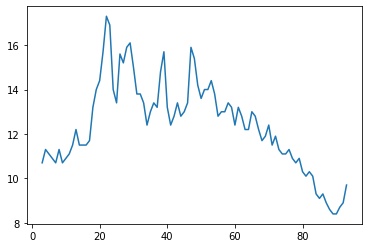

In [187]:
import matplotlib.pyplot as plt
plt.plot(df1['WindSpeed(kts)'])

In [188]:
df1["WindSpeed(kts)"]

3     10.7
4     11.3
5     11.1
6     10.9
7     10.7
      ... 
89     8.4
90     8.4
91     8.7
92     8.9
93     9.7
Name: WindSpeed(kts), Length: 91, dtype: float64